# Food Dataset Analysis (EDA)

### Suggestions / Things to Explore in EDA (both datasets):

Note: for each insight found about the dataset, it is recommended to explain what it tells us about the dataset, why it's significant, 

- [ ] **Dataset directory and split integrity:** verify the expected Food-101 structure and examine the `/root/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256` directory and contents. Confirm class counts match expectations (1,000 images per class)
- [ ] **Image resolutions and aspect ratios:** plot width / height histograms, aspect ratios, resolution scatter, and detect outliers
- [ ] **Brightness / contrast and dynamic range:** inspect pixel intensity histograms and per-image mean/std. Find and keep note of any overly dark, blown-out, or low-contrast classes (for normalization)
- [ ] **Sharpness / blur and quality issues:** use Laplacian variance for blur scores to identify classes with many blurry images


### UEC-Food256 Dataset
Things to consider while looking / exploring dataset

- [ ] **Dataset directory names:** as you can see when you first download the dataset, the folders are named as numbers (1-256). It would be a good idea to rename each folder based on the `category.txt` file which stores the name and id
  - After renaming, check to see if there are any folders of the same name. If there are, decide to merge or keep separate with reasoning.
- [ ]

### Resources:
(may be helpful)
*   https://neptune.ai/blog/data-exploration-for-image-segmentation-and-object-detection
*   https://medium.com/@juanabascal78/exploratory-image-analysis-part-1-advanced-density-plots-19b255075dbd
*   https://www.datacamp.com/tutorial/seeing-like-a-machine-a-beginners-guide-to-image-analysis-in-machine-learning

## Import + Download Dataset

In [1]:
%pip install python-dotenv
%pip install roboflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\jacob\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   - -------------------------------------- 1.3/38.8 MB 7.2 MB/s eta 0:00:06
   -- ------------------------------------- 2.1/38.8 MB 6.7 MB/s eta 0:00:06
   --- ------------------------------------ 3.1/38.8 MB 5.1 MB/s eta 0:00:07
   ---- ----------------------------------- 4.5/38.8 MB 5.6 MB/s eta 0:00:07
   ----- ---------------------------------- 5.8/38.8 MB 5.6 MB/s eta 0:00:06
   ------- -------------------------------- 7.3/38.8 MB 5.8 MB/s eta 0:00:06
   -------- ------------------------------- 8.7/38.8 MB 5.9 MB/s eta 0:00:06
   ---------- ----------------------------- 10.0/38.8 MB 5.9 MB/s eta 0:00:05
   ----------- ---------------------------- 11.3/38.8 MB 6.0 MB/s eta 0:00:05
   ------------ --------------------------- 12.6/38.8 MB 6.0 MB/s eta 0:00:05
   -------------- ------------------------- 13.9/38.8 MB 6.0 MB/s eta 0:00:05
 


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\jacob\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
%pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/3 [protobuf]
   ---------------------------------------- 0/3 [protobuf]
   ------------- -------------------------- 1/3 [kagglesdk]
   ------------- -------------------------- 1/3 [kagglesdk]
   ------------- -------------------------- 1/3 [kagglesdk]
   ------------- -------------------------- 1/3 [kagglesdk]
   -------------------------- ------------- 2/3 [kagglehub]
   ---------------------------------------- 3/3 [kagglehub]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\jacob\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# RUN FOR UEC-FOOD256 DATASET

import kagglehub 
# Download latest version 
path = kagglehub.dataset_download("rkuo2000/uecfood256")
print("Path to dataset files:", path)

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.94G/3.94G [08:34<00:00, 8.23MB/s]

Extracting files...


Path to dataset files: C:\Users\jacob\.cache\kagglehub\datasets\rkuo2000\uecfood256\versions\1


In [8]:
# RUN FOR YUSUF FOOD DATASET
"""
from roboflow import Roboflow
from dotenv import load_dotenv
import os

load_dotenv()  # loads variables from .env into the environment

api_key = os.getenv("YF_API_KEY")

rf = Roboflow(api_key=api_key) 
project = rf.workspace("caretech").project("food-dataset-uj20h-w2s4m")
version = project.version(1)
dataset = version.download("yolov8")
"""

'\nfrom roboflow import Roboflow\nfrom dotenv import load_dotenv\nimport os\n\nload_dotenv()  # loads variables from .env into the environment\n\napi_key = os.getenv("YF_API_KEY")\n\nrf = Roboflow(api_key=api_key) \nproject = rf.workspace("caretech").project("food-dataset-uj20h-w2s4m")\nversion = project.version(1)\ndataset = version.download("yolov8")\n'

In [ ]:
import os

for subdir, dirs, files in os.walk(path):
    print(f"{subdir} → {len(files)} files")

/Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1 → 0 files
/Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256 → 2 files
/Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/135 → 116 files
/Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/61 → 109 files
/Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/95 → 106 files
/Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/132 → 106 files
/Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/59 → 117 files
/Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/92 → 168 files
/Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/66 → 108 files
/Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/104 → 105 file

In [ ]:
# rename uec food 256 directories

import os
import re
import shutil

DATA_ROOT = os.path.join(path, "UECFOOD256")
CATEGORY_TXT_PATH = os.path.join(path, "UECFOOD256","category.txt")


def sanitize_name(name: str) -> str:
  """
  make a filesystem-safe folder name
  - lowercase
  - trim
  - replace spaces with underscores
  - remove non-alphanumeric characters
  """
  s = name.strip().lower()
  s = s.replace("’", "'")  # normalize curly apostrophes
  s = s.replace('"', '')
  s = s.replace("/", " ")  # avoid path separators
  s = s.replace("\\", " ")
  s = s.replace("&", " and ")
  s = s.replace("+", " plus ")
  s = s.replace("–", "-").replace("—", "-")  # dashes
  s = s.replace("’", "'")
  s = s.replace("’", "'")
  # replace whitespace with underscores
  s = re.sub(r"\s+", "_", s)
  # remove invalid chars (keep a-z0-9 _ - . ')
  s = re.sub(r"[^a-z0-9_\-\.']", "", s)
  # collapse underscores
  s = re.sub(r"_+", "_", s)
  # strip leading/trailing underscores or dots
  s = s.strip("._")
  # fall back if empty
  if not s:
    s = "unnamed"
  return s


def parse_category_txt(path: str) -> dict:
  """
  parse category.txt file
  @return dict mapping numeric id (str) -> sanitized_name
  """
  id_to_name = {}
  if not os.path.isfile(path):
    raise FileNotFoundError(f"category.txt not found at {path}")
  with open(path, "r", encoding="utf-8") as f:
    for line in f:
      line = line.strip()
      if not line or line.startswith("#"):
        continue
      # Lines may be "id  name" with multiple spaces; first token is id, rest is name
      parts = re.split(r"\s+", line, maxsplit=1)
      if len(parts) != 2:
        # skip headers like "id  name"
        continue
      id_str, raw_name = parts
      if not id_str.isdigit():
        continue
      safe = sanitize_name(raw_name)
      id_to_name[id_str] = safe
  return id_to_name


def rename_dirs(root: str, id_to_name: dict, dry_run: bool = False) -> list:
  """
  Rename directories in root from numeric id to category name
  @return list of (old_path, new_path)
  """
  changes = []
  if not os.path.isdir(root):
    raise NotADirectoryError(f"Root path not found: {root}")

  # list only top-level directories
  for entry in os.listdir(root):
    old_path = os.path.join(root, entry)
    if not os.path.isdir(old_path):
      continue
    if not entry.isdigit():
      # Already renamed or a non-id dir like 'UECFOOD256' or 'category.txt' parent; skip
      continue
    id_str = entry
    if id_str not in id_to_name:
      print(f"Warning: id {id_str} not found in category.txt. Skipping.")
      continue
    base_name = id_to_name[id_str]
    new_name = base_name
    new_path = os.path.join(root, new_name)

    # resolve collisions
    if os.path.exists(new_path):
      # If target already exists and is the same folder (unlikely), skip
      # Else append id to make it unique
      alt_name = f"{base_name}_{id_str}"
      alt_path = os.path.join(root, alt_name)
      if os.path.exists(alt_path):
        # As a last resort append a numeric suffix
        suffix = 2
        while True:
          candidate = f"{base_name}_{id_str}_{suffix}"
          candidate_path = os.path.join(root, candidate)
          if not os.path.exists(candidate_path):
            new_name = candidate
            new_path = candidate_path
            break
          suffix += 1
      else:
          new_name = alt_name
          new_path = alt_path

    if dry_run:
      print(f"[DRY RUN] Would rename: {old_path} -> {new_path}")
    else:
      os.rename(old_path, new_path)
      changes.append((old_path, new_path))
      print(f"Renamed: {old_path} -> {new_path}")
  print("changes: ", changes)
  return changes



print(f"Reading categories from: {CATEGORY_TXT_PATH}")
id_to_name = parse_category_txt(CATEGORY_TXT_PATH)
print(f"Parsed {len(id_to_name)} categories.")

# preview changes first
print("\nPreview (dry run):")
rename_dirs(DATA_ROOT, id_to_name, dry_run=True)

# if preview looks good, do actual rename
proceed = True
if proceed:
    print("\nApplying renames:")
    changes = rename_dirs(DATA_ROOT, id_to_name, dry_run=False)
    print(f"\nDone. Renamed {len(changes)} folders.")
else:
    print("\nNo changes applied.")

Reading categories from: /Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/category.txt
Parsed 256 categories.

Preview (dry run):
[DRY RUN] Would rename: /Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/135 -> /Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/clear_soup
[DRY RUN] Would rename: /Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/61 -> /Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/steak
[DRY RUN] Would rename: /Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/95 -> /Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/pizza_toast
[DRY RUN] Would rename: /Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/132 -> /Users/leonardosiu/.cache/kagglehub/datasets/rkuo2000/uecfood256/version

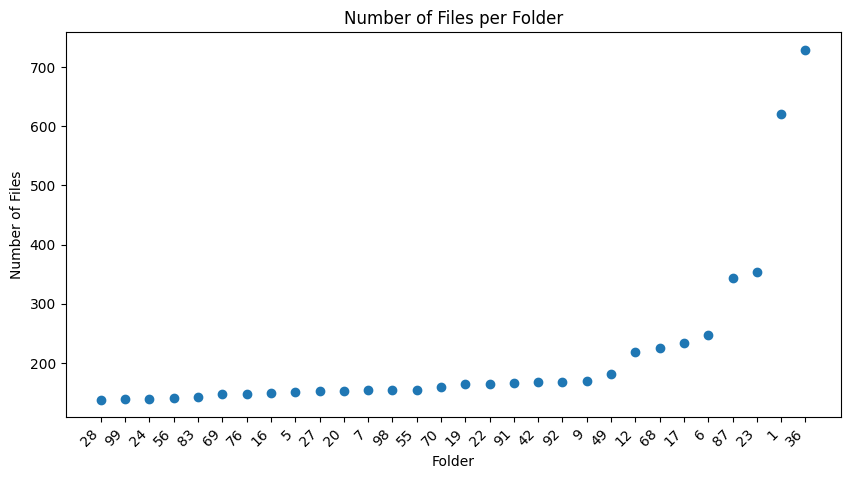

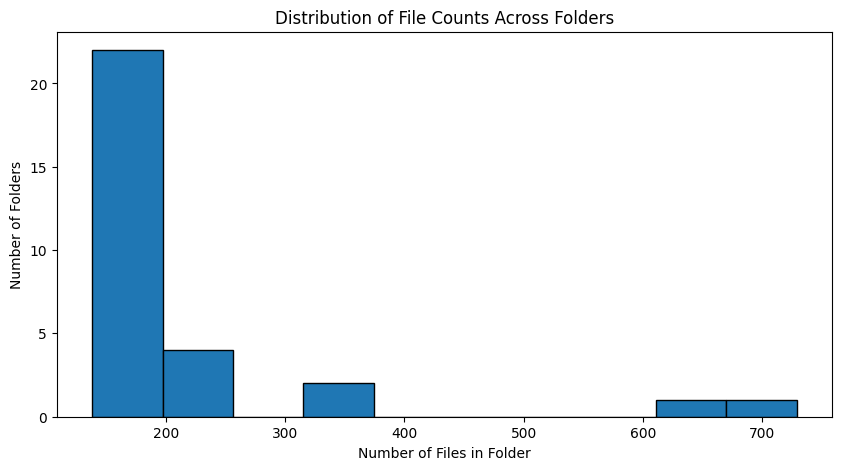

In [18]:
# class distribution: number of files per folder
def count_files(root):
    counts = []
    for entry in os.scandir(root):
        if entry.is_dir():
            count = 0
            for item in os.scandir(entry.path):
                if item.is_file():
                    count += 1
            counts.append((entry.name, count))
    
    counts.sort(key=lambda x: x[1])
    return counts
            
counts = count_files("/Users/jacob/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/")
counts = counts[-30:]
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(
    [folder for folder, _ in counts],
    [count for _, count in counts]
)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Folder")
plt.ylabel("Number of Files")
plt.title("Number of Files per Folder")
plt.show()

file_counts = [count for _, count in counts]

plt.figure(figsize=(10, 5))
plt.hist(file_counts, edgecolor='black')
plt.xlabel("Number of Files in Folder")
plt.ylabel("Number of Folders")
plt.title("Distribution of File Counts Across Folders")
plt.show()

This code counts how many files are inside each of the 256 class folders, sorts the folders by file count, then visualizes the top 30 most populated classes with a scatter plot and shows an overall histogram of folder file counts. For our dataset, it highlights class imbalance (like miso soup and rice having so many), which can bias YOLO training toward the most frequent foods.

Total images: 31395
Min ratio: 0.47538200339558573
Max ratio: 4.322222222222222


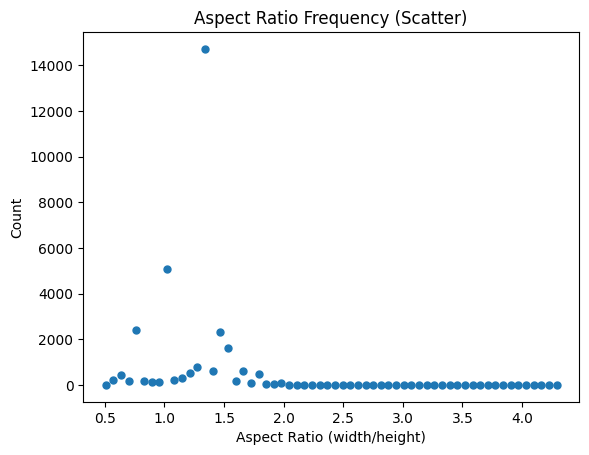

In [14]:

from PIL import Image
import matplotlib.pyplot as plt

def scatter_aspect_ratio_counts(root, bins=50):
    ratios = []

    for dirpath, _, filenames in os.walk(root):
        for fn in filenames:
            if not fn.lower().endswith((".jpg", ".jpeg", ".png")):
                continue
            path = os.path.join(dirpath, fn)

            try:
                with Image.open(path) as img:
                    w, h = img.size
                ratios.append(w / h)
            except:
                continue

    print("Total images:", len(ratios))
    print("Min ratio:", min(ratios))
    print("Max ratio:", max(ratios))

    # counts, edges, patches
    counts, edges, _ = plt.hist(ratios, bins=bins)
    plt.clf()

    centers = [(edges[i] + edges[i+1]) / 2 for i in range(len(edges) - 1)]

    plt.scatter(centers, counts, s=25)
    plt.title("Aspect Ratio Frequency (Scatter)")
    plt.xlabel("Aspect Ratio (width/height)")
    plt.ylabel("Count")
    plt.show()

scatter_aspect_ratio_counts(
    "/Users/jacob/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/",
    bins=60
)


This code scans all images in the UECFOOD256 directory, computes each image’s aspect ratio (width/height), then plots a scatter of aspect-ratio bin centers vs. the number of images in each bin to visualize the distribution and outliers. For our dataset, this quickly shows whether most images are roughly consistent in shape and highlights extreme wide/tall outliers.

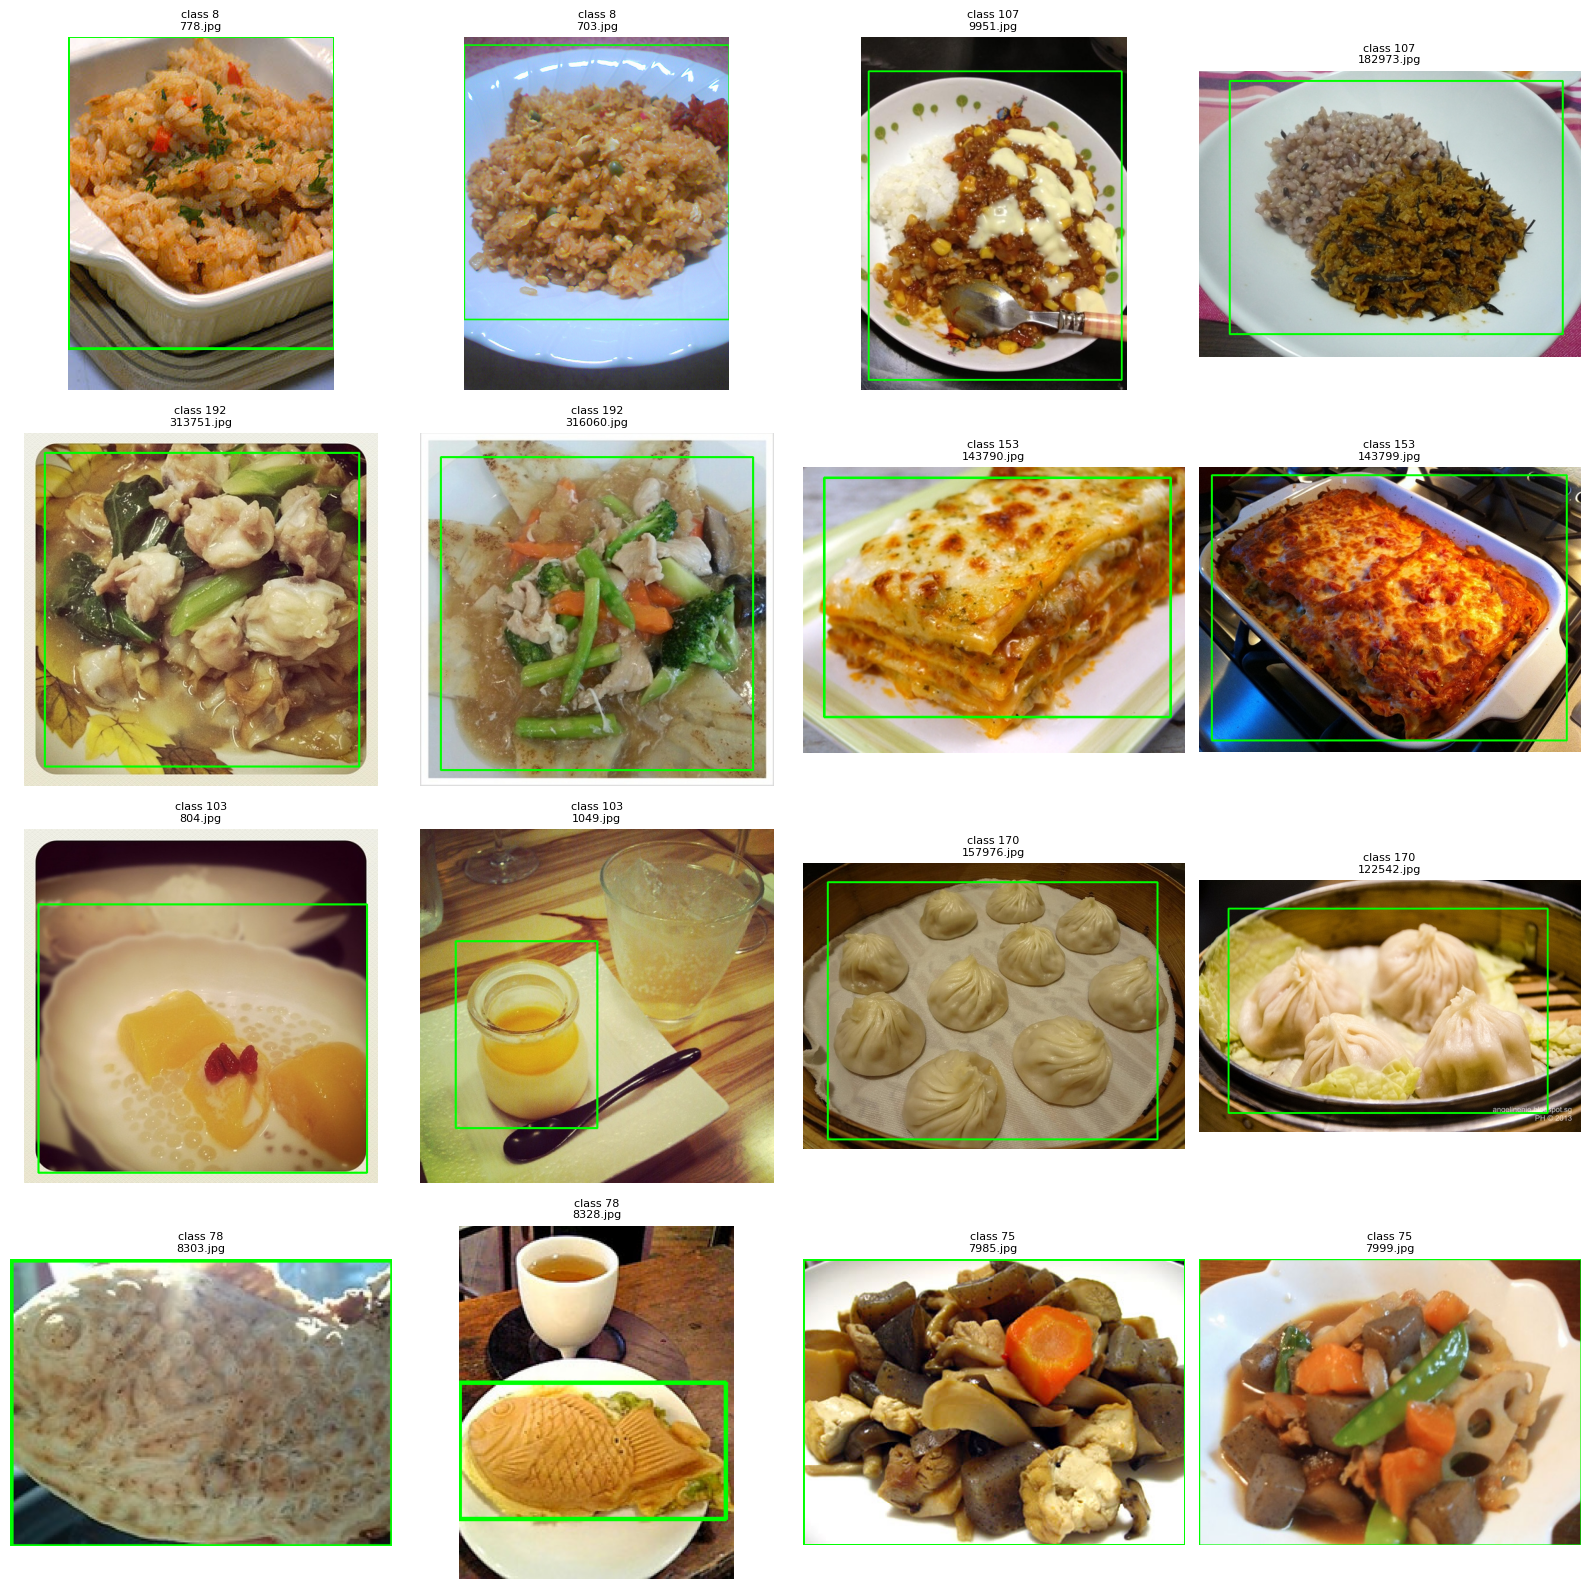

In [17]:
import random
import cv2
import matplotlib.pyplot as plt

ROOT = "/Users/jacob/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/"

def find_bb_info_file(folder_path):
    candidates = ["bb_info.txt", "bb_info", "bb_info.dat", "bb_info.csv"]
    for c in candidates:
        p = os.path.join(folder_path, c)
        if os.path.exists(p):
            return p
    for fn in os.listdir(folder_path):
        low = fn.lower()
        if "bb" in low and "info" in low and os.path.isfile(os.path.join(folder_path, fn)):
            return os.path.join(folder_path, fn)
    return None

def load_bb_info(bb_path):
    boxes = {}
    with open(bb_path, "r") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            parts = line.split()
            if parts[0].lower() in ("img", "image"):  # skip header
                continue
            if len(parts) < 5:
                continue
            img_id, x1, y1, x2, y2 = parts[0], parts[1], parts[2], parts[3], parts[4]
            boxes[img_id] = (int(x1), int(y1), int(x2), int(y2))
    return boxes

def find_image_path(folder_path, img_id):
    for ext in [".jpg", ".jpeg", ".png"]:
        p = os.path.join(folder_path, img_id + ext)
        if os.path.exists(p):
            return p
    return None

def show_multiclass_samples(root, num_classes=8, per_class=2, seed=42):
    random.seed(seed)

    # collect class dirs
    class_dirs = [os.path.join(root, d) for d in os.listdir(root)
                  if os.path.isdir(os.path.join(root, d))]
    random.shuffle(class_dirs)

    samples = []  # (img_path, box, class_name)

    for class_dir in class_dirs:
        if len({c for _,_,c in samples}) >= num_classes:
            break

        bb_path = find_bb_info_file(class_dir)
        if bb_path is None:
            continue

        boxes = load_bb_info(bb_path)
        if not boxes:
            continue

        img_ids = list(boxes.keys())
        random.shuffle(img_ids)

        taken = 0
        for img_id in img_ids:
            img_path = find_image_path(class_dir, img_id)
            if img_path is None:
                continue

            samples.append((img_path, boxes[img_id], os.path.basename(class_dir)))
            taken += 1
            if taken >= per_class:
                break

    total_needed = num_classes * per_class
    samples = samples[:total_needed]

    if len(samples) == 0:
        print("No samples found. Check bb_info filename and image extensions.")
        return

    cols = 4
    rows = (len(samples) + cols - 1) // cols
    plt.figure(figsize=(4*cols, 4*rows))

    for i, (img_path, (x1,y1,x2,y2), class_name) in enumerate(samples):
        img = cv2.imread(img_path)
        if img is None:
            continue

        cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(rows, cols, i+1)
        plt.imshow(img_rgb)
        plt.title(f"class {class_name}\n{os.path.basename(img_path)}", fontsize=8)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example: 8 classes * 2 images = 16 images
show_multiclass_samples(ROOT, num_classes=8, per_class=2, seed=42)


This script randomly selects images from multiple different class folders, reads each class’s bb_info file to get (x1, y1, x2, y2) bounding-box coordinates, and then displays a grid of sampled images with the bounding boxes drawn on top for quick visual inspection. For our dataset, this helps verify that the bb_info annotations actually line up with the food objects across different classes and quickly reveals common label issues.

In [3]:
def find_images_missing_bbox(parent_folder):
    missing_by_class = {}

    for entry in os.listdir(parent_folder):
        subdir_path = os.path.join(parent_folder, entry)
        if not os.path.isdir(subdir_path):
            continue

        bbox_images = set()
        bb_info_path = os.path.join(subdir_path, "bb_info.txt")

        if os.path.isfile(bb_info_path):
            with open(bb_info_path, "r") as f:
                next(f)
                for line in f:
                    parts = line.strip().split()
                    if parts:
                        bbox_images.add(int(parts[0]))
                        
        file_images = set()
        for fname in os.listdir(subdir_path):
            if fname.lower().endswith((".jpg", ".jpeg", ".png")):
                name, _ = os.path.splitext(fname)
                if name.isdigit():
                    file_images.add(int(name))

        missing = file_images - bbox_images
        if missing:
            missing_by_class[entry] = missing

    return missing_by_class


root = "/Users/jacob/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/"
missing = find_images_missing_bbox(root)

print(missing)

{}


This segment of code checks each bb_info and extracts the image names and looks at all the images in each file and compares both sets and if something is missing marks it as missing by adding to a dict and then returns the missing dict. In this case, it is empty because all of the bounding boxes appear to be present.